# Accessing MT time series data from the NCI THREDDS Data Server using OPeNDAP

### Requirements

The following tutorial shows how to access magnetotelluric (MT) time series data stored as NetCDF4 files from the National Computational Infrastructure (NCI) [THREDDS data server](http://dapds00.nci.org.au/thredds/catalogs/my80/catalog.html). 

This tutorial makes use of [the IOOS THREDDS crawler](https://github.com/ioos/thredds_crawler) as well as the Python3 library [urllib.request](https://docs.python.org/3/library/urllib.request.html).

Additionally, the following Python3 libraries are required to run this tutorial:<br/>
[netcdf4-python](https://unidata.github.io/netcdf4-python/netCDF4/index.html)<br/>
[matplotlib.pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)<br/>
[numpy](https://numpy.org/)<br/>
[os](https://docs.python.org/3/library/os.html)

## Import libraries

In [1]:
from thredds_crawler.crawl import Crawl
import urllib.request 
import urllib
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
import numpy as np
import os
%matplotlib inline

## Run a crawl on the NCI THREDDS Data Server AusLAMP Musgraves MT time series endpoint xml.

In [2]:
### For this example, we are looking at the Level 1 time series data

c = Crawl('http://dapds00.nci.org.au/thredds/catalog/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/catalog.xml', select=['.*nc'])

## Using OPeNDAP to view MT time series metadata and data

In [3]:
### define all OPeNDAP URLs 
urls_opendap = [s.get("url") for d in c.datasets for s in d.services if s.get("service").lower() == "opendap"] 

In [4]:
## look at the first 3 OPeNDAP endpoints
print(urls_opendap[:3])

['http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA225-2_138_173.nc', 'http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA227_130_133.nc', 'http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA242_304_322.nc']


In [5]:
## print the number of OPeNDAP endpoints from the crawl
print(len(urls_opendap))

47


In [6]:
### let's look at 2 example Level 1 Musgraves MT Time Series NetCDF files (stations SA271 and SA272)
SA271 = [i for i in urls_opendap if i.split('/')[-1].startswith('SA271')]
SA272 = [i for i in urls_opendap if i.split('/')[-1].startswith('SA272')]

In [7]:
## print OPeNDAP endpoints for SA271 and SA272
print(SA271)
print(SA272)

['http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA271_134_172.nc']
['http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA272_134_172.nc']


In [8]:
### let's browse some of the metadata from the 2 example Level 1 Musgraves MT Time Series NetCDF files

for opendap_example in SA271:
    print(opendap_example)
    f = Dataset(opendap_example, 'r')
    print(f.dimensions.keys())
    print('site name is:', f.site_name)
    print('field recorded latitude is:', f.field_GPS_latitude_dec_deg)
    print('field recorded longitude is:', f.field_GPS_longitude_dec_deg)   
    print('MT box case number is:', f.MT_box_case_number)
    print('magnetometer_type_model is',f.magnetometer_type_model)
    print('power_source_type is',f.power_source_type_or_model)
    print('')

for opendap_example in SA272:
    print(opendap_example)
    f = Dataset(opendap_example, 'r')
    print(f.dimensions.keys())
    print('site name is:', f.site_name)
    print('field recorded latitude is:', f.field_GPS_latitude_dec_deg)
    print('field recorded longitude is:', f.field_GPS_longitude_dec_deg)    
    print('MT box case number is:', f.MT_box_case_number)
    print('magnetometer_type_model is',f.magnetometer_type_model)
    print('power_source_type is',f.power_source_type_or_model)
    print('')

http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA271_134_172.nc
odict_keys(['bx', 'by', 'bz', 'ex', 'ey', 'time'])
site name is: GVD
field recorded latitude is: -27.49422
field recorded longitude is: 132.00921
MT box case number is: 18
magnetometer_type_model is Bartington, Model - Mag03MS70  (70 nano Tesla), Type - Fluxgate, 3 Component, Frequency response: 0 - 1kHz, Bandwidth: 0 - 3kHz
power_source_type is 12Volt 72 Amp/Hr Battery, Power Supply Charging - Solar Panel, 60Watt

http://dapds00.nci.org.au/thredds/dodsC/my80/AusLAMP/SA_AusLAMP_MT_Survey_Musgraves_APY_2016_to_2018/SA/Level_1_Concatenated_Resampled_Rotated_Time_Series_NetCDF/SA272_134_172.nc
odict_keys(['bx', 'by', 'bz', 'ex', 'ey', 'time'])
site name is: South of Illllinna
field recorded latitude is: -27.49907
field recorded longitude is: 131.50538
MT box case number is: 5
magnetometer_type_model is Bartington

In [9]:
### Checking that variables in SA271 have the same shape

f = Dataset(SA271[0],'r')
vars = f.variables.keys()
for item in vars:
    print('Variable: \t', item)
    print('Dimensions: \t', f[item].dimensions)
    print('Shape:    \t', f[item].shape, '\n')

Variable: 	 ex
Dimensions: 	 ('ex',)
Shape:    	 (3369600,) 

Variable: 	 ey
Dimensions: 	 ('ey',)
Shape:    	 (3369600,) 

Variable: 	 bx
Dimensions: 	 ('bx',)
Shape:    	 (3369600,) 

Variable: 	 by
Dimensions: 	 ('by',)
Shape:    	 (3369600,) 

Variable: 	 bz
Dimensions: 	 ('bz',)
Shape:    	 (3369600,) 

Variable: 	 time
Dimensions: 	 ('time',)
Shape:    	 (3369600,) 



In [10]:
### Checking variables in SA272 have the same shape

g = Dataset(SA272[0],'r')
vars = g.variables.keys()
for item in vars:
    print('Variable: \t', item)
    print('Dimensions: \t', g[item].dimensions)
    print('Shape:    \t', g[item].shape, '\n')

Variable: 	 ex
Dimensions: 	 ('ex',)
Shape:    	 (3369600,) 

Variable: 	 ey
Dimensions: 	 ('ey',)
Shape:    	 (3369600,) 

Variable: 	 bx
Dimensions: 	 ('bx',)
Shape:    	 (3369600,) 

Variable: 	 by
Dimensions: 	 ('by',)
Shape:    	 (3369600,) 

Variable: 	 bz
Dimensions: 	 ('bz',)
Shape:    	 (3369600,) 

Variable: 	 time
Dimensions: 	 ('time',)
Shape:    	 (3369600,) 



Text(0, 0.5, 'mV/m')

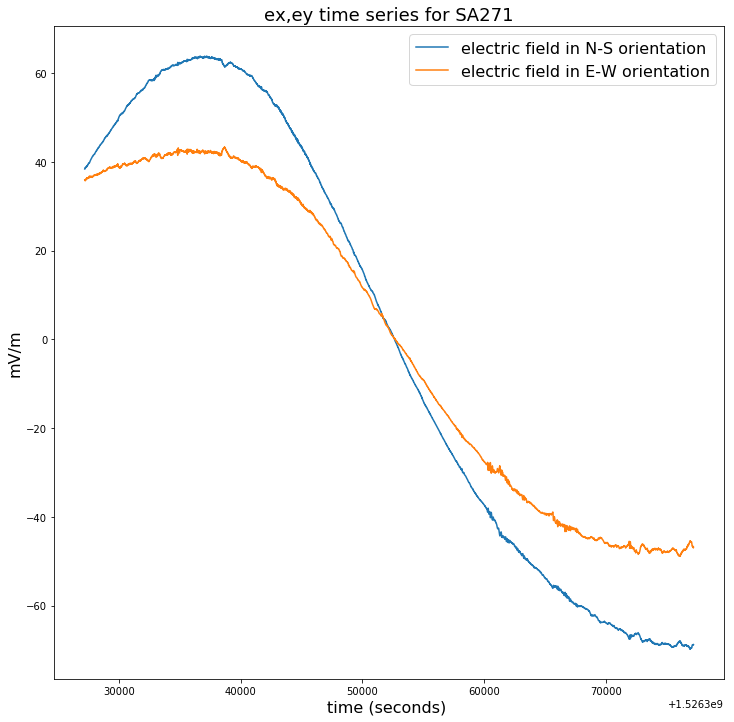

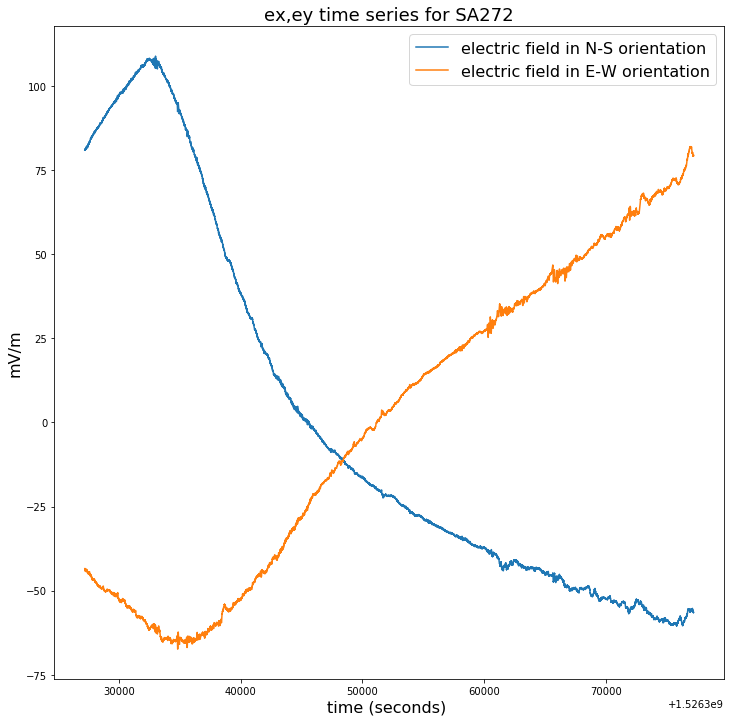

In [11]:
### let's start looking at some of the time series data from SA271 and SA272

ex_271 = f['ex']
ey_271 = f['ey']
bx_271 = f['bx']
by_271 = f['by']
time_271 = f['time']

ex_272 = g['ex']
ey_272 = g['ey']
bx_272 = g['bx']
by_272 = g['by']
time_272 = g['time']

### checking 50000 points for ex and ey to see if the time series data looks reasonable
plt.figure(figsize=(12,12))
plt.title("ex,ey time series for SA271", fontsize=18)
plt.plot(time_271[100000:150000],ex_271[100000:150000]-np.mean(ex_271[100000:150000]),label = ex_271.long_name)
plt.plot(time_271[100000:150000],ey_271[100000:150000]-np.mean(ey_271[100000:150000]),label = ey_271.long_name)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.xlabel(time_271.long_name+' ('+ time_271.units +') ', fontsize=16)
plt.ylabel(ex_271.units, fontsize=16)

plt.figure(figsize=(12,12))
plt.title("ex,ey time series for SA272", fontsize=18)
plt.plot(time_272[100000:150000],ex_272[100000:150000]-np.mean(ex_272[100000:150000]),label = ex_272.long_name)
plt.plot(time_272[100000:150000],ey_272[100000:150000]-np.mean(ey_272[100000:150000]),label = ey_272.long_name)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.xlabel(time_272.long_name+' ('+ time_272.units +') ', fontsize=16)
plt.ylabel(ex_272.units, fontsize=16)


Text(0, 0.5, 'nT')

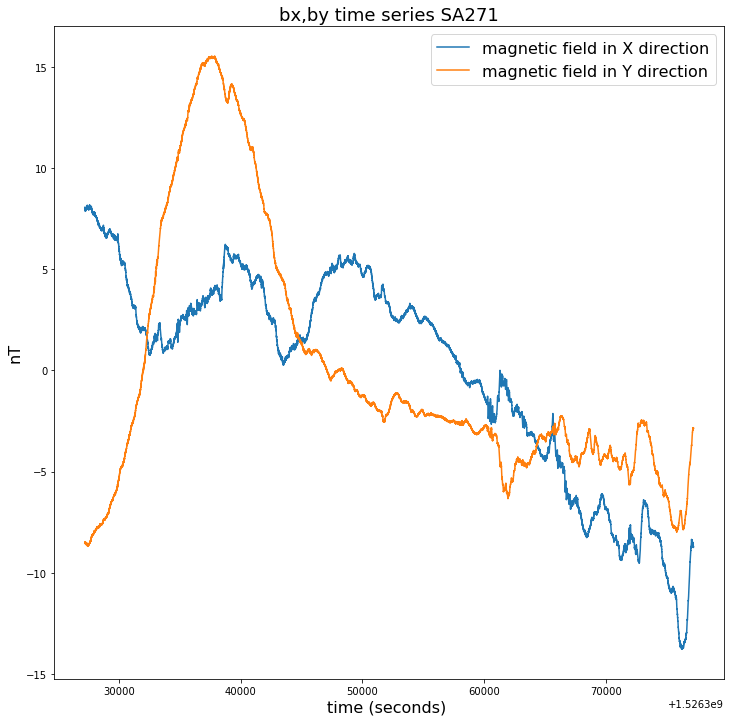

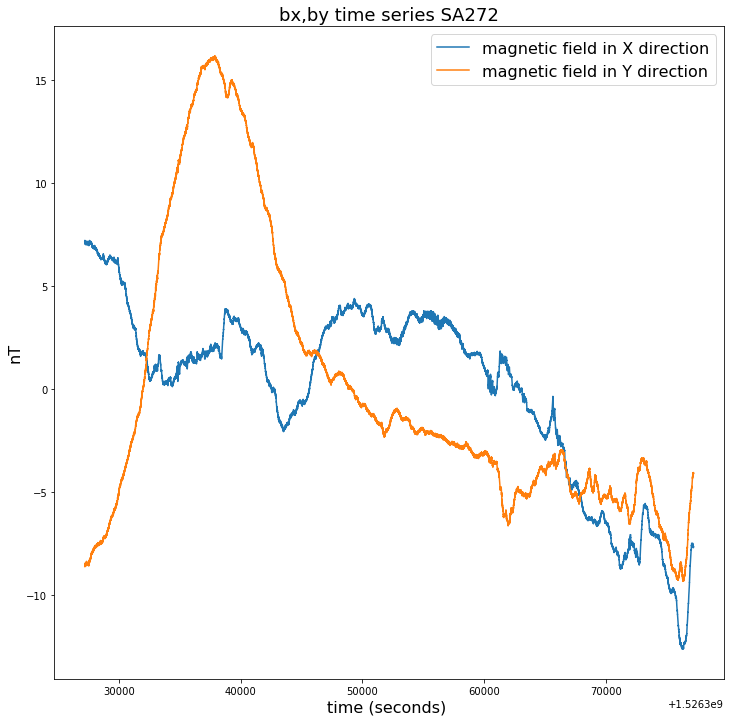

In [12]:
### checking 50000 points of bx and by to see if data looks reasonable
plt.figure(figsize=(12,12))
plt.title("bx,by time series SA271", fontsize=18)
plt.plot(time_271[100000:150000],bx_271[100000:150000]-np.mean(bx_271[100000:150000]),label = bx_271.long_name)
plt.plot(time_271[100000:150000],by_271[100000:150000]-np.mean(by_271[100000:150000]),label = by_271.long_name)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.xlabel(time_271.long_name+' ('+ time_271.units +') ', fontsize=16)
plt.ylabel(bx_271.units, fontsize=16)

plt.figure(figsize=(12,12))
plt.title("bx,by time series SA272", fontsize=18)
plt.plot(time_272[100000:150000],bx_272[100000:150000]-np.mean(bx_272[100000:150000]),label = bx_272.long_name)
plt.plot(time_272[100000:150000],by_272[100000:150000]-np.mean(by_272[100000:150000]),label = by_272.long_name)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.xlabel(time_272.long_name+' ('+ time_272.units +') ', fontsize=16)
plt.ylabel(bx_272.units, fontsize=16)

Text(0, 0.5, 'mV/m')

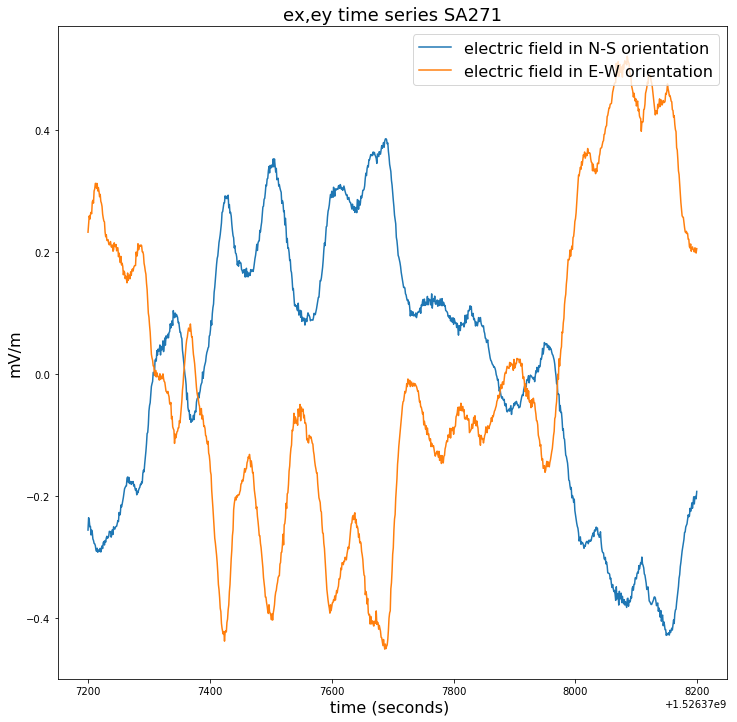

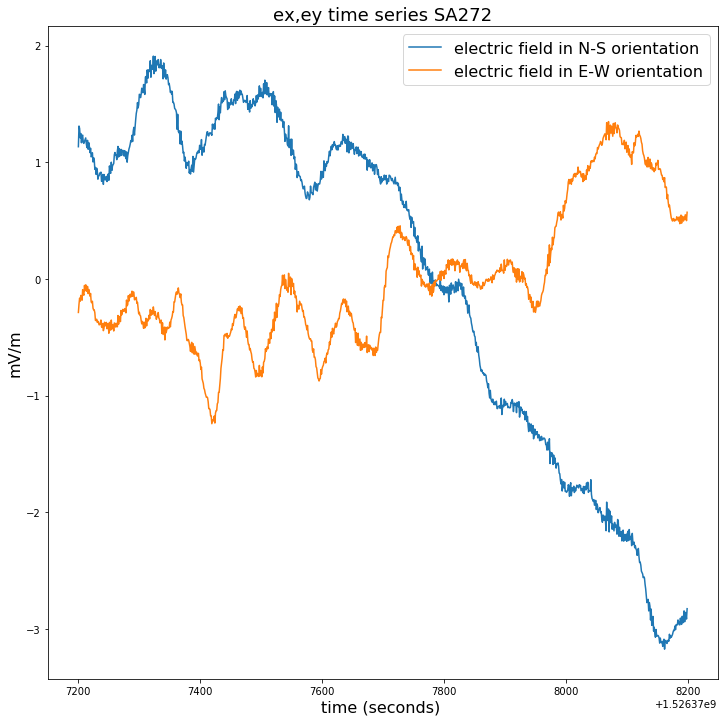

In [13]:
### checking 1000 points of ex and ey from SA271 and SA272
plt.figure(figsize=(12,12))
plt.title("ex,ey time series SA271", fontsize=18)
plt.plot(time_271[150000:151000],ex_271[150000:151000]-np.mean(ex_271[150000:151000]),label = ex_271.long_name)
plt.plot(time_271[150000:151000],ey_271[150000:151000]-np.mean(ey_271[150000:151000]),label = ey_271.long_name)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.xlabel(time_271.long_name+' ('+ time_271.units +') ', fontsize=16)
plt.ylabel(ex_271.units, fontsize=16)

plt.figure(figsize=(12,12))
plt.title("ex,ey time series SA272", fontsize=18)
plt.plot(time_272[150000:151000],ex_272[150000:151000]-np.mean(ex_272[150000:151000]),label = ex_272.long_name)
plt.plot(time_272[150000:151000],ey_272[150000:151000]-np.mean(ey_272[150000:151000]),label = ey_272.long_name)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.xlabel(time_272.long_name+' ('+ time_272.units +') ', fontsize=16)
plt.ylabel(ex_272.units, fontsize=16)

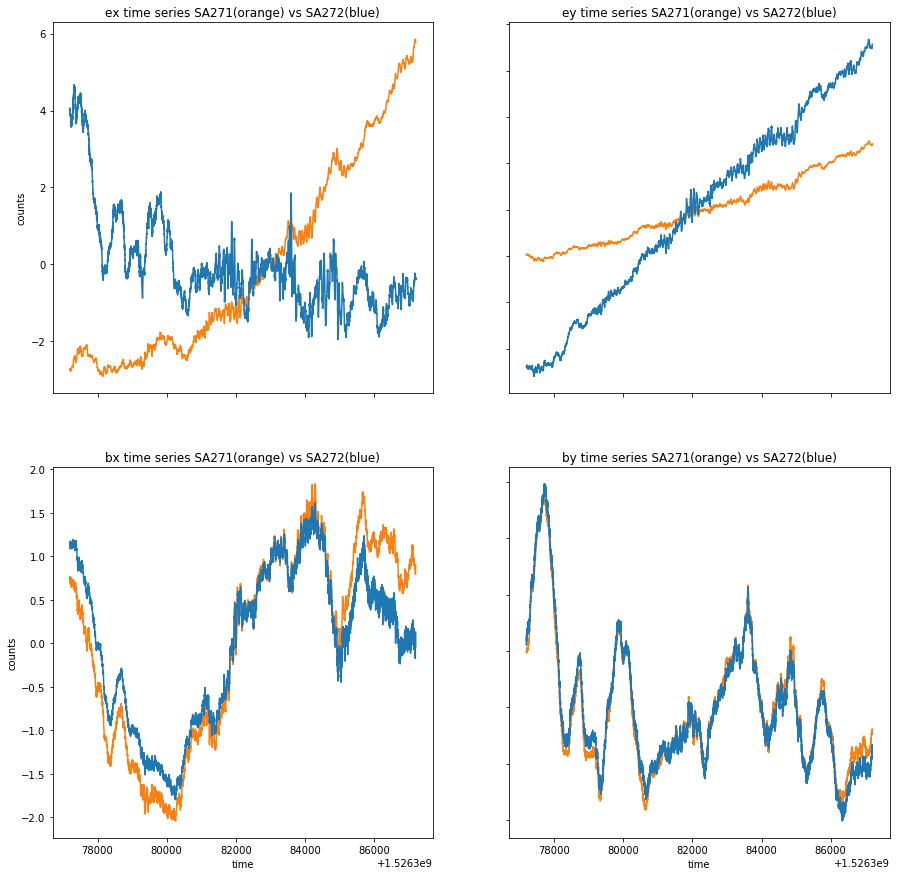

In [14]:
### Compare ex,ey,bx,by from stations SA271 and SA272

fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].plot(time_271[150000:160000], ex_271[150000:160000]-np.mean(ex_271[150000:160000]),'tab:orange')
axs[0, 0].plot(time_272[150000:160000], ex_272[150000:160000]-np.mean(ex_272[150000:160000]),'tab:blue')
axs[0, 0].set_title('ex time series SA271(orange) vs SA272(blue)')
axs[0, 1].plot(time_271[150000:160000], ey_271[150000:160000]-np.mean(ey_271[150000:160000]), 'tab:orange')
axs[0, 1].plot(time_272[150000:160000], ey_272[150000:160000]-np.mean(ey_272[150000:160000]),'tab:blue')
axs[0, 1].set_title('ey time series SA271(orange) vs SA272(blue)')
axs[1, 0].plot(time_271[150000:160000], bx_271[150000:160000]-np.mean(bx_271[150000:160000]), 'tab:orange')
axs[1, 0].plot(time_272[150000:160000], bx_272[150000:160000]-np.mean(bx_272[150000:160000]), 'tab:blue')
axs[1, 0].set_title('bx time series SA271(orange) vs SA272(blue)')
axs[1, 1].plot(time_271[150000:160000], by_271[150000:160000]-np.mean(by_271[150000:160000]), 'tab:orange')
axs[1, 1].plot(time_272[150000:160000], by_272[150000:160000]-np.mean(by_272[150000:160000]), 'tab:blue')
axs[1, 1].set_title('by time series SA271(orange) vs SA272(blue)')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='counts')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [15]:
### close plots

plt.close('all')

#### Let's try and process some time series in the frequency domain using the [Bounded Influence, Remote Reference Processing (BIRRP) code](https://www.whoi.edu/science/AOPE/people/achave/Site/Next1.html). 

Note that for this example, we are using an NCI modified parallelised version of BIRRP that allows for electromagnetic field inputs from a NetCDF4 file.

In [16]:
### set this to the location of the NetCDF/mpi modified version of the BIRRP code
birrp_location = '/g/data/my80/test/BIRRP_dev/birrp_NR_test/gadi_2020/birrp_mpi'

### set this to a working directory where you would like to run BIRRP example 
working_directory = '/g/data/uc0/nre900/MT/MT_jupyter_notebook/birrp_processing_example'

### let's change into our working directory
os.chdir(working_directory)

In [17]:
### Let's run BIRRP on 2 million data points for this example. First we can define SA271 as the local site and SA272 as the remote reference

start_point = 10
end_point = 2000010

EX = ex_271[start_point:end_point]
EY = ey_271[start_point:end_point]
BX = bx_271[start_point:end_point]
BY = by_271[start_point:end_point]
BXRR = bx_272[start_point:end_point]
BYRR = by_272[start_point:end_point]

In [18]:
### Let's create a netCDF file with the BIRRP variable inputs

dataset_P = Dataset('SA271_rr_SA272.nc','w',format='NETCDF4')

### define netCDF dimensions
ex = dataset_P.createDimension('ex', len(EX))
ey = dataset_P.createDimension('ey', len(EY))
bx = dataset_P.createDimension('bx', len(BX))
by = dataset_P.createDimension('by', len(BY))
bxrr = dataset_P.createDimension('bxrr', len(BXRR))
byrr = dataset_P.createDimension('byrr', len(BYRR))

### define netCDF variables
ex = dataset_P.createVariable('ex',np.float32,('ex',))
ex[:] = EX

ey = dataset_P.createVariable('ey',np.float32,('ey',))
ey[:] = EY

bx = dataset_P.createVariable('bx',np.float32,('bx',))
bx[:] = BX

by = dataset_P.createVariable('by',np.float32,('by',))
by[:] = BY

bxrr = dataset_P.createVariable('bxrr',np.float32,('bxrr',))
bxrr[:] = BXRR

byrr = dataset_P.createVariable('byrr',np.float32,('byrr',))
byrr[:] = BYRR

dataset_P.close()

In [19]:
### Let's define our BIRRP processing parameters

birrp_processing_parameters = """1
2
2
2
1
3
1
32768,2,9
3,1,3
y
2
0,0.0003,0.9999
0.7
0.0
0.003,1
SA271_rrSA272
0
0
1
10
0
0
2000000
0
ex@SA271_rr_SA272.nc
0
0
ey@SA271_rr_SA272.nc
0
0
bx@SA271_rr_SA272.nc
0
0
by@SA271_rr_SA272.nc
0
0
bxrr@SA271_rr_SA272.nc
0
0
byrr@SA271_rr_SA272.nc
0
180,90,180
0,90,0
0,90,0
""" 

In [20]:
### let's write the birrp processing parameters input file for BIRRP
birrp_input = open("birrp_processing_parameters","wt")
n = birrp_input.write(birrp_processing_parameters)
birrp_input.close()

In [21]:
### next we need to make a Gadi PBS job script to run BIRRP on our example file

runjob = """
#!/bin/bash
#PBS -q express
#PBS -P z00
#PBS -l walltime=00:01:00   
#PBS -l ncpus=8   
#PBS -l mem=2GB   
#PBS -l jobfs=1GB  
#PBS -l wd
#PBS -N birrp_271_272 
#PBS -l storage=gdata/uc0+gdata/z00+gdata/my80

module load openmpi/3.1.4

mpirun -np 8 --mca pml ob1 /g/data/my80/test/BIRRP_dev/birrp_NR_test/gadi_2020/birrp_mpi  < birrp_processing_parameters 
"""

In [22]:
### write PBS job script file

runjob_input = open("runjob.ob1.sh", "wt")
runjob_input.write(runjob)
runjob_input.close()

In [23]:
### Let's submit our PBS job

!qsub runjob.ob1.sh

5843475.gadi-pbs


In [24]:
### We can monitor our PBS job

!qstat 

Job id                 Name             User              Time Use S Queue
---------------------  ---------------- ----------------  -------- - -----
5843475.gadi-pbs       birrp_271_272    nre900                   0 Q express-exec    


In [25]:
### Let's check that our BIRRP output files have been created

!ls

birrp_271_272.e5843475	     SA271_rrSA272.1r.2c2  SA271_rrSA272.2r.2c2
birrp_271_272.o5843475	     SA271_rrSA272.1r2.rf  SA271_rrSA272.2r2.rf
birrp_processing_parameters  SA271_rrSA272.1r2.rp  SA271_rrSA272.2r2.rp
runjob.ob1.sh		     SA271_rrSA272.1r2.tf  SA271_rrSA272.2r2.tf
SA271_rrSA272.1n.1c2	     SA271_rrSA272.2n.1c2  SA271_rrSA272.diag.000
SA271_rrSA272.1n1.rf	     SA271_rrSA272.2n1.rf  SA271_rrSA272.diag.001
SA271_rrSA272.1n1.rp	     SA271_rrSA272.2n1.rp  SA271_rrSA272.diag.002
SA271_rrSA272.1n1.tf	     SA271_rrSA272.2n1.tf  SA271_rrSA272.diag.003
SA271_rrSA272.1n.2c2	     SA271_rrSA272.2n.2c2  SA271_rrSA272.diag.004
SA271_rrSA272.1n2.rf	     SA271_rrSA272.2n2.rf  SA271_rrSA272.diag.005
SA271_rrSA272.1n2.rp	     SA271_rrSA272.2n2.rp  SA271_rrSA272.diag.006
SA271_rrSA272.1n2.tf	     SA271_rrSA272.2n2.tf  SA271_rrSA272.diag.007
SA271_rrSA272.1r.1c2	     SA271_rrSA272.2r.1c2  SA271_rrSA272.j
SA271_rrSA272.1r1.rf	     SA271_rrSA272.2r1.rf  SA271_rr_SA272.nc
SA271_rrSA272.1r1.rp	    